In [3]:
import pandas as pd
import gc
from sklearn import preprocessing
import time
import math
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
total =  pickle.load(open('../../data/raw/total_high_level.pkl','rb+'))

In [15]:
total.columns

Index(['context_id', 'context_page_id', 'context_timestamp', 'instance_id',
       'is_trade', 'item_brand_id', 'item_category_list', 'item_city_id',
       'item_collected_level', 'item_id', 'item_price_level',
       'item_property_list', 'item_pv_level', 'item_sales_level',
       'predict_category_property', 'shop_id', 'shop_review_num_level',
       'shop_review_positive_rate', 'shop_score_delivery',
       'shop_score_description', 'shop_score_service', 'shop_star_level',
       'user_age_level', 'user_gender_id', 'user_id', 'user_occupation_id',
       'user_star_level', 'day', 'hour', 'minute', 'user_id_shop_id',
       'user_id_item_id', 'user_id_item_price_level',
       'user_id_item_sales_level', 'user_id_item_collected_level',
       'user_id_item_pv_level', 'user_id_shop_review_num_level',
       'user_id_shop_star_level', 'age_item_id', 'age_shop_id',
       'gender_item_id', 'gender_shop_id'],
      dtype='object')

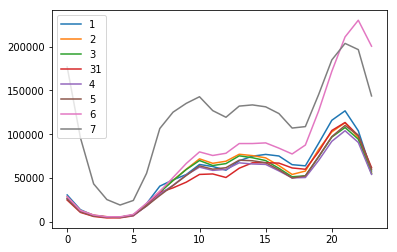

In [43]:
#分析每天的流量走势
tmp = pd.DataFrame({"count":total.groupby(["day","hour"])["instance_id"].count()}).reset_index()
tmp.sort_values(["day","hour"],inplace=True)

t31 = tmp.loc[(tmp["day"]==31)]["count"].values
t1 = tmp.loc[(tmp["day"]==1)]["count"].values
t2 = tmp.loc[(tmp["day"]==2)]["count"].values
t3 = tmp.loc[(tmp["day"]==3)]["count"].values
t4 = tmp.loc[(tmp["day"]==4)]["count"].values
t5 = tmp.loc[(tmp["day"]==5)]["count"].values
t6 = tmp.loc[(tmp["day"]==6)]["count"].values
t7 = tmp.loc[(tmp["day"]==7)]["count"].values
t8 = tmp.loc[(tmp["day"]==8)]["count"].values

variables = pd.DataFrame({'31': t31, 
                          '1': t1,
                          '2': t2,
                          '3': t3,
                         '4':  t4,
                         '5':  t5, 
                         '6':  t6, 
                         '7':  t7})

variables.plot()
plt.show()

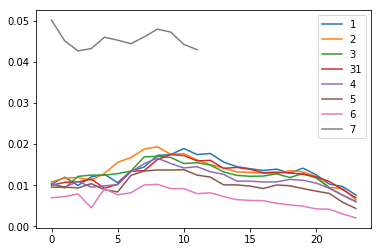

In [47]:
#分析每天的转化率
tmp = pd.DataFrame({"cvr":total.groupby(["day","hour"])["is_trade"].mean()}).reset_index()
tmp.sort_values(["day","hour"],inplace=True)

t31 = tmp.loc[(tmp["day"]==31)]["cvr"].values
t1 = tmp.loc[(tmp["day"]==1)]["cvr"].values
t2 = tmp.loc[(tmp["day"]==2)]["cvr"].values
t3 = tmp.loc[(tmp["day"]==3)]["cvr"].values
t4 = tmp.loc[(tmp["day"]==4)]["cvr"].values
t5 = tmp.loc[(tmp["day"]==5)]["cvr"].values
t6 = tmp.loc[(tmp["day"]==6)]["cvr"].values
t7 = tmp.loc[(tmp["day"]==7)]["cvr"].values
t8 = tmp.loc[(tmp["day"]==8)]["cvr"].values
variables = pd.DataFrame({'31': t31, 
                          '1': t1,
                          '2': t2,
                          '3': t3,
                         '4':  t4,
                         '5':  t5, 
                         '6':  t6, 
                         '7':  t7})
variables.plot()
plt.show()

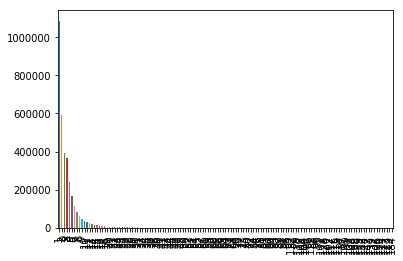

In [74]:
#统计每个用户的点击量
tmp = pd.DataFrame({"count":total.groupby(["user_id"])["is_trade"].count()}).reset_index()
tmp.sort_values(["count"],inplace=True)
tmp['count'].value_counts().plot.bar()  
plt.show()  